In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv(r"C:\Users\Lenovo\Downloads\Train_aBjfeNk.csv")

test=pd.read_csv(r"C:\Users\Lenovo\Downloads\Test_LqhgPWU.csv")

In [4]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [5]:
#combine data
combined=train.append(test)

In [6]:
combined.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [7]:
#Statistical test for verifing the spending score with segmenttion
#Ho:spending score has no effect
#Ha: spending score has an effect
tb1=pd.crosstab(train.Spending_Score,train.Segmentation)   

In [8]:
import scipy.stats as stats


tstats,pvalue,df,exp_freq=stats.chi2_contingency(tb1)

#inference- we reject null Ho,i.e. spending score has an impact on segmentation

In [9]:
print(tstats,pvalue)

1516.8787583775006 0.0


In [10]:
combined.groupby('Segmentation')['Spending_Score'].value_counts()

Segmentation  Spending_Score
A             Low               1358
              Average            343
              High               271
B             Low                884
              Average            590
              High               384
C             Average            903
              Low                662
              High               405
D             Low               1974
              High               156
              Average            138
Name: Spending_Score, dtype: int64

* **C** has  the highest no. of **High Spenders**
* **D** has the highest Number of **Low Spenders**
* **C** has the highest number of **Average Spenders**

Note:Clusters Count will be 4 i.e. A,B,C,D

In [11]:
mapped=({'D':0,"A":1,"B":2,'C':3})

combined['Segmentation']=combined.Segmentation.map(mapped)

In [12]:
# Univariatte andbivariate Analysis

# categorical

combined.select_dtypes(exclude=np.number).columns

Index(['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1'],
      dtype='object')

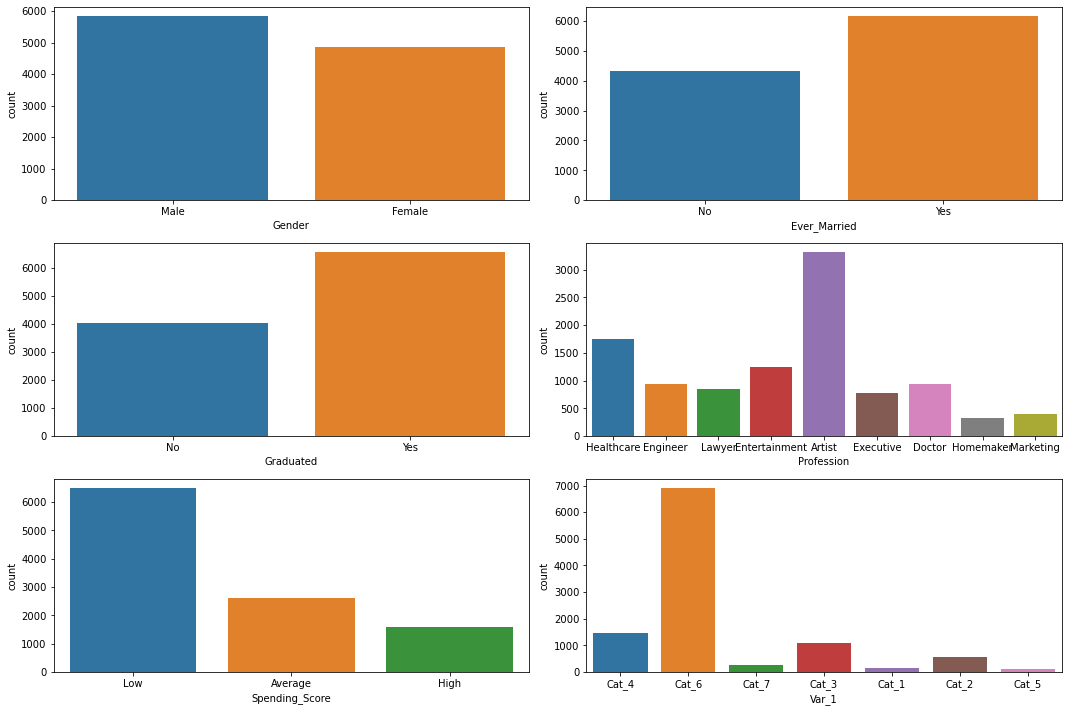

In [13]:
plt.figure(figsize=(15,10))
cols=['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score',
       'Var_1']
a=3
b=2
c=1

for i in cols:
    plt.subplot(a,b,c)
    sns.countplot(combined.loc[:,i])
    c+=1
    
plt.tight_layout()
plt.show()

* More Males than Female followed by Graduation =Yes
* MOst of the people re Married and mostly Artist followed by healthcare
* Most of the people in data are low spenders.
* Highest frequency of var1 is cat_6 followed by cat_4,cat_3 and cat_2.

In [14]:
# numerical
combined.select_dtypes(include=np.number).columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation'], dtype='object')

<AxesSubplot:>

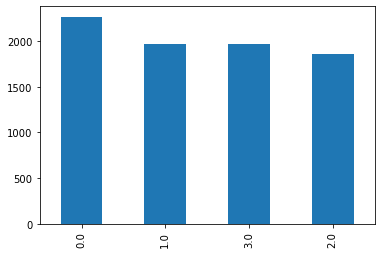

In [15]:
combined.Segmentation.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Age', ylabel='Density'>

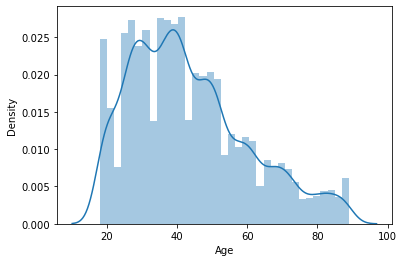

In [16]:
sns.distplot(combined.Age)

In [17]:
# lets explore age basis spending score and segmentation

combined.groupby(['Spending_Score','Segmentation'])['Age'].describe()

count       mean        std   min   25%   50%  \
Spending_Score Segmentation                                                   
Average        0.0            138.0  37.746377  11.353035  18.0  30.0  36.0   
               1.0            343.0  42.157434  11.885602  20.0  35.0  40.0   
               2.0            590.0  46.866102  10.451637  25.0  38.0  46.0   
               3.0            903.0  50.053156  10.195182  22.0  42.0  50.0   
High           0.0            156.0  48.192308  20.404653  18.0  30.0  42.0   
               1.0            271.0  58.494465  20.482490  18.0  39.5  59.0   
               2.0            384.0  58.643229  16.154292  18.0  45.0  58.0   
               3.0            405.0  60.167901  14.733489  19.0  49.0  60.0   
Low            0.0           1974.0  31.915907  14.833252  18.0  22.0  28.0   
               1.0           1358.0  42.916053  15.138088  18.0  32.0  40.0   
               2.0            884.0  44.554299  14.597057  18.0  33.0  42.0   
               3.0            662.0  41.160121  14.793844  18.0  30.0  38.0   

                               75%   max  
Spending_Score Segmentation               
Average        0.0           41.75  72.0  
               1.0           48.50  89.0  
               2.0           53.00  74.0  
               3.0           57.00  88.0  
High           0.0           68.00  89.0  
               1.0           77.00  89.0  
               2.0           72.00  89.0  
               3.0           71.00  89.0  
Low            0.0           35.00  89.0  
               1.0           50.00  89.0  
               2.0           53.00  89.0  
               3.0           50.00  88.0

* Age Bins :  18-25|25-30|30-40|40-50|>50

* Check Anova

In [18]:
#Ho: Age has no effect on segmentation
#Ha: Age has an effect on segmentation

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# this means we have to check age effect so that we can bin accordingly

model=ols('Age~Segmentation',data=train).fit()
anova_lm(model)

# Inference : Age is significant for target
# pvalue is very small we will reject the null hypothesis 

,df,sum_sq,mean_sq,F,PR(>F)
Segmentation,3.0,3.396070e+05,113202.343669,477.102025,2.188783e-285
Residual,8064.0,1.913351e+06,237.270726,NaN,NaN


In [19]:
#lets deal with age
combined.loc[(combined.Age<=25) & (combined.Age>=18),'Age_Category']=1

combined.loc[(combined.Age<=30) & (combined.Age>25),'Age_Category']=2

combined.loc[(combined.Age<=40) & (combined.Age>30),'Age_Category']=3

combined.loc[(combined.Age<=50) & (combined.Age>40),'Age_Category']=4

combined.loc[(combined.Age>50),'Age_Category']=5

In [20]:
combined.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Category
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0.0,1.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1.0,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2.0,5.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2.0,5.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1.0,3.0


<AxesSubplot:xlabel='Age_Category', ylabel='count'>

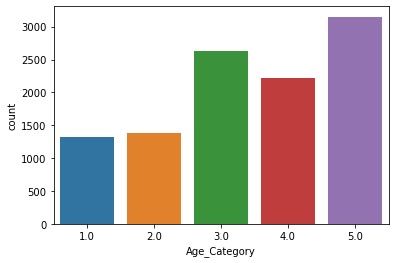

In [21]:
sns.countplot(combined['Age_Category'])

In [22]:
#Missing values
combined.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_Category          0
dtype: int64

In [23]:
# Imputing unknown in the missing values

combined['Ever_Married']=combined.Ever_Married.fillna('unk')

combined['Graduated']=combined.Graduated.fillna('unk')

combined['Profession']=combined.Profession.fillna('unk')

combined['Work_Experience']=combined.Work_Experience.fillna(-1)

combined['Family_Size']=combined.Family_Size.fillna(-1)

combined['Var_1']=combined.Var_1.fillna('unk')

In [24]:
#Map the Variables

combined['Gender']=combined.Gender.map({'Male':1,'Female':2})

combined['Ever_Married']=combined.Ever_Married.map({'No':1,'Yes':2,'unk':3})

combined['Graduated']=combined.Graduated.map({'No':1,'Yes':2,'unk':3})

combined['Spending_Score']=combined.Spending_Score.map({'Low':1,'Average':2,'High':3})

combined['Var_1']=combined.Var_1.map({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,
                                      'Cat_7':7,'unk':8})


In [25]:
# profession
combined.Profession.value_counts().index

Index(['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
       'Executive', 'Marketing', 'Homemaker', 'unk'],
      dtype='object')

In [26]:
combined['Profession']=combined.Profession.map({'Artist':1, 'Healthcare':2, 'Entertainment':3, 'Engineer':4, 'Doctor':5,
                         'Lawyer':6, 'Executive':7, 'Marketing':8, 'Homemaker':9, 'unk':10})

In [27]:
combined.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_Category
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1.0
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3.0
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5.0
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5.0
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,3.0


In [28]:
combined['Family_Size'].value_counts()

 2.0    3158
 1.0    1965
 3.0    1952
 4.0    1823
 5.0     812
-1.0     448
 6.0     290
 7.0     122
 8.0      65
 9.0      60
Name: Family_Size, dtype: int64

In [29]:
#family category
combined.loc[combined.Family_Size<=2,'Family_Cat']=1

combined.loc[(combined.Family_Size>2)  & (combined.Family_Size<=5),"Family_Cat"]=2

combined.loc[combined.Family_Size>5,"Family_Cat"]=3

In [30]:
combined.Work_Experience.value_counts()

 1.0     3127
 0.0     3087
-1.0     1098
 9.0      613
 8.0      612
 2.0      373
 4.0      346
 3.0      337
 5.0      270
 6.0      265
 7.0      256
 14.0      66
 10.0      64
 11.0      64
 12.0      60
 13.0      57
Name: Work_Experience, dtype: int64

In [31]:
combined.loc[combined.Work_Experience<=0,'Work_Cat']=0

combined.loc[(combined.Work_Experience==1,'Work_Cat')] =1

combined.loc[(combined.Work_Experience>=2)  & (combined.Work_Experience<=5),"Work_Cat"]=2

combined.loc[(combined.Work_Experience>5)  & (combined.Work_Experience<=10),"Work_Cat"]=3

combined.loc[combined.Work_Experience>10,"Work_Cat"]=4

## Feature Engineering

In [32]:
temp = combined.groupby ("Age").agg({"Spending_Score": ["count", "min",
                                                        "mean", "max"],
                                                        "Family_Size": ["count", "min","max"],
                                                        "Work_Experience": [ "count","min","mean", "max"],
                                                        "Profession": ["count", "min", "max"],
                                                        "Var_1": ["count", "min", "max"]})

In [33]:
temp.columns=['_'.join(x) for x in temp.columns]

new=pd.merge(left=combined,right=temp,on='Age',how='left')

In [34]:
new.shape

(10695, 31)

In [35]:
new.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Work_Experience_count,Work_Experience_min,Work_Experience_mean,Work_Experience_max,Profession_count,Profession_min,Profession_max,Var_1_count,Var_1_min,Var_1_max
0,462809,1,1,22,1,2,1.0,1,4.0,4,...,184,-1.0,1.820652,11.0,184,1,10,184,1,8
1,462643,2,2,38,2,4,-1.0,2,3.0,4,...,288,-1.0,3.100694,14.0,288,1,10,288,1,8
2,466315,2,2,67,2,4,1.0,1,1.0,6,...,78,-1.0,0.717949,10.0,78,1,10,78,1,7
3,461735,1,2,67,2,6,0.0,3,2.0,6,...,78,-1.0,0.717949,10.0,78,1,10,78,1,7
4,462669,2,2,40,2,3,-1.0,3,6.0,6,...,300,-1.0,3.220000,14.0,300,1,10,300,1,8


## Splitting in Train and Test

In [36]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [37]:
newtrain=new.loc[0:train.shape[0]-1,:]
newtest=new.loc[train.shape[0]:,:]

In [38]:
newtrain.shape,newtest.shape

((8068, 31), (2627, 31))

In [39]:
## dropping segmentation in new test
X=newtrain.drop(['ID','Segmentation'],axis=1)
y=newtrain.Segmentation

newtest=newtest.drop(['ID','Segmentation'],axis=1)

In [40]:
## deleting temporary and Combined data
del temp,combined

## Modelling 

In [41]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=420)

X['Clusters']=kmeans.fit_predict(X)

In [42]:
# generating Cluster Labels in test Dataset
kmeans=KMeans(n_clusters=4,random_state=420)

newtest['Clusters']=kmeans.fit_predict(newtest)

### Model Building

Note: We willl build all the models by splitting Train Data as Website has some submission issues.

1. Split the Train Data in Train and test
2. Build Logistic Regression,Random Forest Model,Gradient Booosting followed by XGBoost Model
3. We will separately build LGBM and cat boost
4. We will see which models gets highest accuracy. We will use Cross Validation to build
   CV model where CV = 5
5. Stacking Classification Model

In [43]:
# slitting
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=420,stratify=X['Clusters'])

In [44]:
##Import Model Libraries and Create Model Instances
from sklearn.linear_model import LogisticRegression
from sklearn. ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [85]:
lg = LogisticRegression(random_state = 140)
rf = RandomForestClassifier(random_state = 598)
gbm = GradientBoostingClassifier(random_state = 150)
xgb = XGBClassifier(random_state = 138,max_depth=7)
lgbm = LGBMClassifier(random_state = 438)
cboost = CatBoostClassifier(random_state = 660)

In [86]:
from sklearn.metrics import accuracy_score

In [87]:
for model, name in zip([lg, rf, gbm, xgb, lgbm, cboost],["le","rf","gbm","xgb","lgbm","cboost"]):
    model.fit(X_train, y_train)
    print('{} model genrates an accuracy score of {}'.format(name,accuracy_score(y_test,model.predict(X_test))))

le model genrates an accuracy score of 0.4448574969021066
rf model genrates an accuracy score of 0.46406443618339527
gbm model genrates an accuracy score of 0.5291201982651796
xgb model genrates an accuracy score of 0.4950433705080545
lgbm model genrates an accuracy score of 0.5285006195786865
Learning rate set to 0.087021
0:	learn: 1.3387664	total: 11.9ms	remaining: 11.9s
1:	learn: 1.3024426	total: 23.3ms	remaining: 11.6s
2:	learn: 1.2719394	total: 35.1ms	remaining: 11.7s
3:	learn: 1.2448538	total: 46.5ms	remaining: 11.6s
4:	learn: 1.2224130	total: 57.5ms	remaining: 11.4s
5:	learn: 1.2054308	total: 68.2ms	remaining: 11.3s
6:	learn: 1.1889196	total: 78.9ms	remaining: 11.2s
7:	learn: 1.1739049	total: 89.9ms	remaining: 11.2s
8:	learn: 1.1619905	total: 100ms	remaining: 11s
9:	learn: 1.1495519	total: 111ms	remaining: 11s
10:	learn: 1.1390490	total: 122ms	remaining: 11s
11:	learn: 1.1296267	total: 133ms	remaining: 10.9s
12:	learn: 1.1209105	total: 143ms	remaining: 10.9s
13:	learn: 1.1131853

165:	learn: 0.9220545	total: 1.73s	remaining: 8.68s
166:	learn: 0.9216973	total: 1.74s	remaining: 8.68s
167:	learn: 0.9209411	total: 1.75s	remaining: 8.69s
168:	learn: 0.9203582	total: 1.76s	remaining: 8.68s
169:	learn: 0.9201338	total: 1.77s	remaining: 8.66s
170:	learn: 0.9194204	total: 1.78s	remaining: 8.65s
171:	learn: 0.9183715	total: 1.79s	remaining: 8.63s
172:	learn: 0.9178392	total: 1.8s	remaining: 8.62s
173:	learn: 0.9171104	total: 1.81s	remaining: 8.61s
174:	learn: 0.9163920	total: 1.82s	remaining: 8.59s
175:	learn: 0.9159372	total: 1.83s	remaining: 8.58s
176:	learn: 0.9156273	total: 1.84s	remaining: 8.56s
177:	learn: 0.9150850	total: 1.85s	remaining: 8.54s
178:	learn: 0.9142561	total: 1.86s	remaining: 8.53s
179:	learn: 0.9138017	total: 1.87s	remaining: 8.52s
180:	learn: 0.9129392	total: 1.88s	remaining: 8.5s
181:	learn: 0.9125877	total: 1.89s	remaining: 8.49s
182:	learn: 0.9117414	total: 1.9s	remaining: 8.48s
183:	learn: 0.9110041	total: 1.91s	remaining: 8.48s
184:	learn: 0.9

336:	learn: 0.8270568	total: 3.49s	remaining: 6.86s
337:	learn: 0.8267181	total: 3.5s	remaining: 6.85s
338:	learn: 0.8260604	total: 3.51s	remaining: 6.85s
339:	learn: 0.8254616	total: 3.52s	remaining: 6.84s
340:	learn: 0.8250330	total: 3.53s	remaining: 6.83s
341:	learn: 0.8242867	total: 3.54s	remaining: 6.82s
342:	learn: 0.8238292	total: 3.55s	remaining: 6.81s
343:	learn: 0.8236915	total: 3.56s	remaining: 6.79s
344:	learn: 0.8230259	total: 3.57s	remaining: 6.78s
345:	learn: 0.8225931	total: 3.58s	remaining: 6.77s
346:	learn: 0.8220370	total: 3.59s	remaining: 6.76s
347:	learn: 0.8215134	total: 3.6s	remaining: 6.75s
348:	learn: 0.8212399	total: 3.61s	remaining: 6.74s
349:	learn: 0.8208515	total: 3.62s	remaining: 6.73s
350:	learn: 0.8205741	total: 3.63s	remaining: 6.71s
351:	learn: 0.8203032	total: 3.64s	remaining: 6.7s
352:	learn: 0.8199859	total: 3.65s	remaining: 6.69s
353:	learn: 0.8193902	total: 3.66s	remaining: 6.68s
354:	learn: 0.8191135	total: 3.67s	remaining: 6.67s
355:	learn: 0.8

505:	learn: 0.7589325	total: 5.25s	remaining: 5.13s
506:	learn: 0.7586012	total: 5.26s	remaining: 5.12s
507:	learn: 0.7582752	total: 5.28s	remaining: 5.11s
508:	learn: 0.7579080	total: 5.29s	remaining: 5.1s
509:	learn: 0.7576147	total: 5.3s	remaining: 5.09s
510:	learn: 0.7573313	total: 5.31s	remaining: 5.08s
511:	learn: 0.7568532	total: 5.32s	remaining: 5.07s
512:	learn: 0.7565113	total: 5.33s	remaining: 5.06s
513:	learn: 0.7562444	total: 5.34s	remaining: 5.05s
514:	learn: 0.7557087	total: 5.35s	remaining: 5.04s
515:	learn: 0.7555068	total: 5.36s	remaining: 5.02s
516:	learn: 0.7551912	total: 5.37s	remaining: 5.01s
517:	learn: 0.7547307	total: 5.38s	remaining: 5s
518:	learn: 0.7542868	total: 5.39s	remaining: 4.99s
519:	learn: 0.7537924	total: 5.4s	remaining: 4.98s
520:	learn: 0.7531719	total: 5.41s	remaining: 4.97s
521:	learn: 0.7528963	total: 5.42s	remaining: 4.96s
522:	learn: 0.7525483	total: 5.43s	remaining: 4.95s
523:	learn: 0.7523602	total: 5.43s	remaining: 4.94s
524:	learn: 0.7517

675:	learn: 0.7019909	total: 7.02s	remaining: 3.36s
676:	learn: 0.7017367	total: 7.03s	remaining: 3.35s
677:	learn: 0.7013111	total: 7.04s	remaining: 3.35s
678:	learn: 0.7009983	total: 7.05s	remaining: 3.33s
679:	learn: 0.7007732	total: 7.06s	remaining: 3.32s
680:	learn: 0.7004546	total: 7.08s	remaining: 3.31s
681:	learn: 0.6999355	total: 7.08s	remaining: 3.3s
682:	learn: 0.6996840	total: 7.1s	remaining: 3.29s
683:	learn: 0.6993002	total: 7.11s	remaining: 3.28s
684:	learn: 0.6987655	total: 7.12s	remaining: 3.27s
685:	learn: 0.6984954	total: 7.13s	remaining: 3.26s
686:	learn: 0.6982997	total: 7.14s	remaining: 3.25s
687:	learn: 0.6979255	total: 7.15s	remaining: 3.24s
688:	learn: 0.6973277	total: 7.16s	remaining: 3.23s
689:	learn: 0.6970368	total: 7.17s	remaining: 3.22s
690:	learn: 0.6966408	total: 7.18s	remaining: 3.21s
691:	learn: 0.6963724	total: 7.19s	remaining: 3.2s
692:	learn: 0.6962065	total: 7.2s	remaining: 3.19s
693:	learn: 0.6959117	total: 7.21s	remaining: 3.18s
694:	learn: 0.69

845:	learn: 0.6522822	total: 8.79s	remaining: 1.6s
846:	learn: 0.6519037	total: 8.81s	remaining: 1.59s
847:	learn: 0.6515452	total: 8.82s	remaining: 1.58s
848:	learn: 0.6513384	total: 8.83s	remaining: 1.57s
849:	learn: 0.6508709	total: 8.84s	remaining: 1.56s
850:	learn: 0.6506118	total: 8.85s	remaining: 1.55s
851:	learn: 0.6505104	total: 8.86s	remaining: 1.54s
852:	learn: 0.6504051	total: 8.87s	remaining: 1.53s
853:	learn: 0.6501077	total: 8.88s	remaining: 1.52s
854:	learn: 0.6498979	total: 8.89s	remaining: 1.51s
855:	learn: 0.6496744	total: 8.9s	remaining: 1.5s
856:	learn: 0.6495704	total: 8.91s	remaining: 1.49s
857:	learn: 0.6491906	total: 8.92s	remaining: 1.48s
858:	learn: 0.6489274	total: 8.93s	remaining: 1.47s
859:	learn: 0.6485623	total: 8.94s	remaining: 1.46s
860:	learn: 0.6481960	total: 8.95s	remaining: 1.45s
861:	learn: 0.6477577	total: 8.96s	remaining: 1.43s
862:	learn: 0.6474706	total: 8.97s	remaining: 1.42s
863:	learn: 0.6473128	total: 8.99s	remaining: 1.41s
864:	learn: 0.6

In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X,y)

In [89]:
from sklearn.model_selection import train_test_split

sX_train,sX_test,sy_train,sy_test=train_test_split(X_train_sm,y_train_sm,test_size=0.20,random_state=420,stratify=X_train_sm['Clusters'])

In [90]:
for model, name in zip([lg, rf, gbm, xgb, lgbm, cboost],["le","rf","gbm","xgb","lgbm","cboost"]):
    model.fit(sX_train, sy_train)
    print('{} model genrates an accuracy score of {}'.format(name,accuracy_score(y_test,model.predict(X_test))))

le model genrates an accuracy score of 0.4516728624535316
rf model genrates an accuracy score of 0.7230483271375465
gbm model genrates an accuracy score of 0.5594795539033457
xgb model genrates an accuracy score of 0.6871127633209417
lgbm model genrates an accuracy score of 0.6338289962825279
Learning rate set to 0.087543
0:	learn: 1.3408644	total: 25.2ms	remaining: 25.1s
1:	learn: 1.3049081	total: 48.1ms	remaining: 24s
2:	learn: 1.2765147	total: 68.9ms	remaining: 22.9s
3:	learn: 1.2508295	total: 88.7ms	remaining: 22.1s
4:	learn: 1.2298289	total: 110ms	remaining: 21.9s
5:	learn: 1.2117737	total: 129ms	remaining: 21.5s
6:	learn: 1.1948978	total: 150ms	remaining: 21.3s
7:	learn: 1.1784158	total: 179ms	remaining: 22.2s
8:	learn: 1.1678079	total: 199ms	remaining: 22s
9:	learn: 1.1581354	total: 221ms	remaining: 21.9s
10:	learn: 1.1474121	total: 241ms	remaining: 21.7s
11:	learn: 1.1420679	total: 261ms	remaining: 21.5s
12:	learn: 1.1327797	total: 282ms	remaining: 21.4s
13:	learn: 1.1243302	to

160:	learn: 0.9327493	total: 3.13s	remaining: 16.3s
161:	learn: 0.9319942	total: 3.15s	remaining: 16.3s
162:	learn: 0.9313110	total: 3.17s	remaining: 16.3s
163:	learn: 0.9308384	total: 3.18s	remaining: 16.2s
164:	learn: 0.9298381	total: 3.19s	remaining: 16.2s
165:	learn: 0.9288689	total: 3.21s	remaining: 16.1s
166:	learn: 0.9284587	total: 3.23s	remaining: 16.1s
167:	learn: 0.9280771	total: 3.24s	remaining: 16.1s
168:	learn: 0.9274452	total: 3.25s	remaining: 16s
169:	learn: 0.9267973	total: 3.27s	remaining: 16s
170:	learn: 0.9262763	total: 3.29s	remaining: 15.9s
171:	learn: 0.9257849	total: 3.3s	remaining: 15.9s
172:	learn: 0.9248400	total: 3.32s	remaining: 15.9s
173:	learn: 0.9241604	total: 3.34s	remaining: 15.8s
174:	learn: 0.9229657	total: 3.35s	remaining: 15.8s
175:	learn: 0.9225189	total: 3.37s	remaining: 15.8s
176:	learn: 0.9215948	total: 3.39s	remaining: 15.7s
177:	learn: 0.9206897	total: 3.4s	remaining: 15.7s
178:	learn: 0.9200968	total: 3.42s	remaining: 15.7s
179:	learn: 0.9196

319:	learn: 0.8380655	total: 5.82s	remaining: 12.4s
320:	learn: 0.8373560	total: 5.84s	remaining: 12.4s
321:	learn: 0.8366478	total: 5.86s	remaining: 12.3s
322:	learn: 0.8362039	total: 5.88s	remaining: 12.3s
323:	learn: 0.8354036	total: 5.9s	remaining: 12.3s
324:	learn: 0.8350203	total: 5.92s	remaining: 12.3s
325:	learn: 0.8344966	total: 5.94s	remaining: 12.3s
326:	learn: 0.8340818	total: 5.96s	remaining: 12.3s
327:	learn: 0.8334458	total: 5.98s	remaining: 12.2s
328:	learn: 0.8329775	total: 6s	remaining: 12.2s
329:	learn: 0.8325277	total: 6.03s	remaining: 12.2s
330:	learn: 0.8318037	total: 6.05s	remaining: 12.2s
331:	learn: 0.8310719	total: 6.07s	remaining: 12.2s
332:	learn: 0.8306168	total: 6.08s	remaining: 12.2s
333:	learn: 0.8299196	total: 6.11s	remaining: 12.2s
334:	learn: 0.8292411	total: 6.13s	remaining: 12.2s
335:	learn: 0.8288160	total: 6.15s	remaining: 12.2s
336:	learn: 0.8283621	total: 6.17s	remaining: 12.1s
337:	learn: 0.8278550	total: 6.2s	remaining: 12.1s
338:	learn: 0.827

480:	learn: 0.7662323	total: 9.02s	remaining: 9.73s
481:	learn: 0.7658007	total: 9.04s	remaining: 9.71s
482:	learn: 0.7654750	total: 9.05s	remaining: 9.69s
483:	learn: 0.7650736	total: 9.07s	remaining: 9.67s
484:	learn: 0.7642869	total: 9.08s	remaining: 9.65s
485:	learn: 0.7637896	total: 9.1s	remaining: 9.62s
486:	learn: 0.7635173	total: 9.11s	remaining: 9.6s
487:	learn: 0.7632954	total: 9.13s	remaining: 9.58s
488:	learn: 0.7629440	total: 9.14s	remaining: 9.55s
489:	learn: 0.7627480	total: 9.16s	remaining: 9.53s
490:	learn: 0.7624382	total: 9.18s	remaining: 9.51s
491:	learn: 0.7621712	total: 9.19s	remaining: 9.49s
492:	learn: 0.7619793	total: 9.21s	remaining: 9.47s
493:	learn: 0.7617721	total: 9.23s	remaining: 9.45s
494:	learn: 0.7615364	total: 9.24s	remaining: 9.43s
495:	learn: 0.7612264	total: 9.26s	remaining: 9.41s
496:	learn: 0.7608700	total: 9.27s	remaining: 9.38s
497:	learn: 0.7605484	total: 9.29s	remaining: 9.36s
498:	learn: 0.7600331	total: 9.3s	remaining: 9.34s
499:	learn: 0.7

644:	learn: 0.7104548	total: 11.7s	remaining: 6.42s
645:	learn: 0.7101993	total: 11.7s	remaining: 6.4s
646:	learn: 0.7097994	total: 11.7s	remaining: 6.38s
647:	learn: 0.7095477	total: 11.7s	remaining: 6.36s
648:	learn: 0.7092980	total: 11.7s	remaining: 6.34s
649:	learn: 0.7090369	total: 11.7s	remaining: 6.33s
650:	learn: 0.7088125	total: 11.8s	remaining: 6.31s
651:	learn: 0.7085554	total: 11.8s	remaining: 6.29s
652:	learn: 0.7081522	total: 11.8s	remaining: 6.27s
653:	learn: 0.7079238	total: 11.8s	remaining: 6.25s
654:	learn: 0.7075854	total: 11.8s	remaining: 6.23s
655:	learn: 0.7073602	total: 11.8s	remaining: 6.21s
656:	learn: 0.7071194	total: 11.9s	remaining: 6.19s
657:	learn: 0.7068450	total: 11.9s	remaining: 6.17s
658:	learn: 0.7064598	total: 11.9s	remaining: 6.15s
659:	learn: 0.7062366	total: 11.9s	remaining: 6.13s
660:	learn: 0.7059181	total: 11.9s	remaining: 6.12s
661:	learn: 0.7055426	total: 11.9s	remaining: 6.1s
662:	learn: 0.7054230	total: 12s	remaining: 6.08s
663:	learn: 0.70

807:	learn: 0.6605248	total: 14.3s	remaining: 3.41s
808:	learn: 0.6604509	total: 14.4s	remaining: 3.39s
809:	learn: 0.6600701	total: 14.4s	remaining: 3.37s
810:	learn: 0.6598657	total: 14.4s	remaining: 3.35s
811:	learn: 0.6595905	total: 14.4s	remaining: 3.33s
812:	learn: 0.6593658	total: 14.4s	remaining: 3.32s
813:	learn: 0.6591417	total: 14.4s	remaining: 3.3s
814:	learn: 0.6589002	total: 14.4s	remaining: 3.28s
815:	learn: 0.6587044	total: 14.5s	remaining: 3.26s
816:	learn: 0.6583051	total: 14.5s	remaining: 3.25s
817:	learn: 0.6579007	total: 14.5s	remaining: 3.23s
818:	learn: 0.6578004	total: 14.5s	remaining: 3.21s
819:	learn: 0.6575877	total: 14.5s	remaining: 3.19s
820:	learn: 0.6574118	total: 14.6s	remaining: 3.17s
821:	learn: 0.6571586	total: 14.6s	remaining: 3.15s
822:	learn: 0.6568393	total: 14.6s	remaining: 3.14s
823:	learn: 0.6565036	total: 14.6s	remaining: 3.12s
824:	learn: 0.6560551	total: 14.6s	remaining: 3.1s
825:	learn: 0.6558581	total: 14.6s	remaining: 3.08s
826:	learn: 0.

974:	learn: 0.6164285	total: 17.8s	remaining: 457ms
975:	learn: 0.6161683	total: 17.8s	remaining: 439ms
976:	learn: 0.6158435	total: 17.9s	remaining: 420ms
977:	learn: 0.6154472	total: 17.9s	remaining: 402ms
978:	learn: 0.6151731	total: 17.9s	remaining: 384ms
979:	learn: 0.6147751	total: 17.9s	remaining: 366ms
980:	learn: 0.6145692	total: 17.9s	remaining: 347ms
981:	learn: 0.6144040	total: 17.9s	remaining: 329ms
982:	learn: 0.6140775	total: 18s	remaining: 311ms
983:	learn: 0.6139542	total: 18s	remaining: 292ms
984:	learn: 0.6137873	total: 18s	remaining: 274ms
985:	learn: 0.6135977	total: 18s	remaining: 256ms
986:	learn: 0.6133201	total: 18s	remaining: 237ms
987:	learn: 0.6130365	total: 18s	remaining: 219ms
988:	learn: 0.6128305	total: 18.1s	remaining: 201ms
989:	learn: 0.6123716	total: 18.1s	remaining: 183ms
990:	learn: 0.6121397	total: 18.1s	remaining: 164ms
991:	learn: 0.6121085	total: 18.1s	remaining: 146ms
992:	learn: 0.6119362	total: 18.1s	remaining: 128ms
993:	learn: 0.6117118	to

In [91]:
 # Final ModeLs XGB, Cb, GBM & LGBM
# Stacking Classifier
from sklearn.ensemble import StackingClassifier
level0 = [("xgb", xgb),('cboost', cboost),('rf',rf)]
stack = StackingClassifier(estimators=level0,cv = 5)
pred_stack = stack.fit(sX_train, sy_train).predict(X_test)
print(accuracy_score(y_test, pred_stack))

Learning rate set to 0.087543
0:	learn: 1.3408644	total: 19.4ms	remaining: 19.4s
1:	learn: 1.3049081	total: 37.2ms	remaining: 18.6s
2:	learn: 1.2765147	total: 54.6ms	remaining: 18.1s
3:	learn: 1.2508295	total: 71.1ms	remaining: 17.7s
4:	learn: 1.2298289	total: 88.3ms	remaining: 17.6s
5:	learn: 1.2117737	total: 105ms	remaining: 17.4s
6:	learn: 1.1948978	total: 122ms	remaining: 17.3s
7:	learn: 1.1784158	total: 139ms	remaining: 17.2s
8:	learn: 1.1678079	total: 155ms	remaining: 17.1s
9:	learn: 1.1581354	total: 171ms	remaining: 16.9s
10:	learn: 1.1474121	total: 195ms	remaining: 17.5s
11:	learn: 1.1420679	total: 216ms	remaining: 17.8s
12:	learn: 1.1327797	total: 234ms	remaining: 17.8s
13:	learn: 1.1243302	total: 252ms	remaining: 17.7s
14:	learn: 1.1166290	total: 268ms	remaining: 17.6s
15:	learn: 1.1106203	total: 285ms	remaining: 17.5s
16:	learn: 1.1061668	total: 301ms	remaining: 17.4s
17:	learn: 1.1014698	total: 317ms	remaining: 17.3s
18:	learn: 1.0975426	total: 333ms	remaining: 17.2s
19:	le

163:	learn: 0.9308384	total: 2.7s	remaining: 13.8s
164:	learn: 0.9298381	total: 2.72s	remaining: 13.8s
165:	learn: 0.9288689	total: 2.74s	remaining: 13.8s
166:	learn: 0.9284587	total: 2.75s	remaining: 13.7s
167:	learn: 0.9280771	total: 2.77s	remaining: 13.7s
168:	learn: 0.9274452	total: 2.78s	remaining: 13.7s
169:	learn: 0.9267973	total: 2.8s	remaining: 13.7s
170:	learn: 0.9262763	total: 2.81s	remaining: 13.6s
171:	learn: 0.9257849	total: 2.83s	remaining: 13.6s
172:	learn: 0.9248400	total: 2.85s	remaining: 13.6s
173:	learn: 0.9241604	total: 2.86s	remaining: 13.6s
174:	learn: 0.9229657	total: 2.88s	remaining: 13.6s
175:	learn: 0.9225189	total: 2.9s	remaining: 13.6s
176:	learn: 0.9215948	total: 2.92s	remaining: 13.6s
177:	learn: 0.9206897	total: 2.93s	remaining: 13.5s
178:	learn: 0.9200968	total: 2.94s	remaining: 13.5s
179:	learn: 0.9196268	total: 2.96s	remaining: 13.5s
180:	learn: 0.9190309	total: 2.98s	remaining: 13.5s
181:	learn: 0.9184069	total: 2.99s	remaining: 13.5s
182:	learn: 0.9

326:	learn: 0.8340818	total: 5.42s	remaining: 11.2s
327:	learn: 0.8334458	total: 5.44s	remaining: 11.1s
328:	learn: 0.8329775	total: 5.45s	remaining: 11.1s
329:	learn: 0.8325277	total: 5.47s	remaining: 11.1s
330:	learn: 0.8318037	total: 5.49s	remaining: 11.1s
331:	learn: 0.8310719	total: 5.5s	remaining: 11.1s
332:	learn: 0.8306168	total: 5.52s	remaining: 11.1s
333:	learn: 0.8299196	total: 5.53s	remaining: 11s
334:	learn: 0.8292411	total: 5.55s	remaining: 11s
335:	learn: 0.8288160	total: 5.56s	remaining: 11s
336:	learn: 0.8283621	total: 5.58s	remaining: 11s
337:	learn: 0.8278550	total: 5.59s	remaining: 11s
338:	learn: 0.8273033	total: 5.62s	remaining: 10.9s
339:	learn: 0.8267680	total: 5.63s	remaining: 10.9s
340:	learn: 0.8262076	total: 5.65s	remaining: 10.9s
341:	learn: 0.8258796	total: 5.66s	remaining: 10.9s
342:	learn: 0.8253182	total: 5.68s	remaining: 10.9s
343:	learn: 0.8251176	total: 5.69s	remaining: 10.9s
344:	learn: 0.8246799	total: 5.71s	remaining: 10.8s
345:	learn: 0.8243056	t

495:	learn: 0.7612264	total: 8.27s	remaining: 8.41s
496:	learn: 0.7608700	total: 8.3s	remaining: 8.4s
497:	learn: 0.7605484	total: 8.32s	remaining: 8.39s
498:	learn: 0.7600331	total: 8.35s	remaining: 8.38s
499:	learn: 0.7592672	total: 8.37s	remaining: 8.37s
500:	learn: 0.7586734	total: 8.39s	remaining: 8.36s
501:	learn: 0.7581440	total: 8.41s	remaining: 8.35s
502:	learn: 0.7579364	total: 8.44s	remaining: 8.34s
503:	learn: 0.7572500	total: 8.46s	remaining: 8.33s
504:	learn: 0.7570978	total: 8.48s	remaining: 8.31s
505:	learn: 0.7567701	total: 8.51s	remaining: 8.31s
506:	learn: 0.7563730	total: 8.53s	remaining: 8.3s
507:	learn: 0.7559130	total: 8.56s	remaining: 8.29s
508:	learn: 0.7555774	total: 8.58s	remaining: 8.27s
509:	learn: 0.7550407	total: 8.6s	remaining: 8.26s
510:	learn: 0.7545730	total: 8.62s	remaining: 8.25s
511:	learn: 0.7542600	total: 8.65s	remaining: 8.24s
512:	learn: 0.7540384	total: 8.66s	remaining: 8.23s
513:	learn: 0.7536549	total: 8.69s	remaining: 8.22s
514:	learn: 0.75

664:	learn: 0.7044900	total: 12s	remaining: 6.03s
665:	learn: 0.7042686	total: 12s	remaining: 6.01s
666:	learn: 0.7038076	total: 12s	remaining: 5.99s
667:	learn: 0.7034410	total: 12s	remaining: 5.97s
668:	learn: 0.7030892	total: 12s	remaining: 5.95s
669:	learn: 0.7028448	total: 12.1s	remaining: 5.94s
670:	learn: 0.7027083	total: 12.1s	remaining: 5.92s
671:	learn: 0.7022355	total: 12.1s	remaining: 5.9s
672:	learn: 0.7018546	total: 12.1s	remaining: 5.88s
673:	learn: 0.7015200	total: 12.1s	remaining: 5.86s
674:	learn: 0.7009902	total: 12.1s	remaining: 5.85s
675:	learn: 0.7006741	total: 12.2s	remaining: 5.83s
676:	learn: 0.7004957	total: 12.2s	remaining: 5.81s
677:	learn: 0.7001734	total: 12.2s	remaining: 5.79s
678:	learn: 0.6997470	total: 12.2s	remaining: 5.77s
679:	learn: 0.6993609	total: 12.2s	remaining: 5.75s
680:	learn: 0.6991902	total: 12.2s	remaining: 5.74s
681:	learn: 0.6990311	total: 12.3s	remaining: 5.72s
682:	learn: 0.6985327	total: 12.3s	remaining: 5.7s
683:	learn: 0.6981101	to

825:	learn: 0.6558581	total: 14.6s	remaining: 3.08s
826:	learn: 0.6556400	total: 14.7s	remaining: 3.07s
827:	learn: 0.6554938	total: 14.7s	remaining: 3.05s
828:	learn: 0.6551801	total: 14.7s	remaining: 3.03s
829:	learn: 0.6549553	total: 14.7s	remaining: 3.01s
830:	learn: 0.6546186	total: 14.7s	remaining: 3s
831:	learn: 0.6545158	total: 14.7s	remaining: 2.98s
832:	learn: 0.6541833	total: 14.8s	remaining: 2.96s
833:	learn: 0.6538710	total: 14.8s	remaining: 2.94s
834:	learn: 0.6535458	total: 14.8s	remaining: 2.92s
835:	learn: 0.6532335	total: 14.8s	remaining: 2.9s
836:	learn: 0.6531114	total: 14.8s	remaining: 2.89s
837:	learn: 0.6527687	total: 14.8s	remaining: 2.87s
838:	learn: 0.6522545	total: 14.9s	remaining: 2.85s
839:	learn: 0.6518554	total: 14.9s	remaining: 2.83s
840:	learn: 0.6517562	total: 14.9s	remaining: 2.81s
841:	learn: 0.6514307	total: 14.9s	remaining: 2.8s
842:	learn: 0.6512799	total: 14.9s	remaining: 2.78s
843:	learn: 0.6510747	total: 14.9s	remaining: 2.76s
844:	learn: 0.650

988:	learn: 0.6128305	total: 17.4s	remaining: 193ms
989:	learn: 0.6123716	total: 17.4s	remaining: 176ms
990:	learn: 0.6121397	total: 17.4s	remaining: 158ms
991:	learn: 0.6121085	total: 17.4s	remaining: 141ms
992:	learn: 0.6119362	total: 17.4s	remaining: 123ms
993:	learn: 0.6117118	total: 17.5s	remaining: 105ms
994:	learn: 0.6113782	total: 17.5s	remaining: 87.8ms
995:	learn: 0.6112665	total: 17.5s	remaining: 70.2ms
996:	learn: 0.6110524	total: 17.5s	remaining: 52.7ms
997:	learn: 0.6109255	total: 17.5s	remaining: 35.1ms
998:	learn: 0.6105470	total: 17.5s	remaining: 17.6ms
999:	learn: 0.6103715	total: 17.6s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3422995	total: 16.5ms	remaining: 16.5s
1:	learn: 1.3095642	total: 31.3ms	remaining: 15.6s
2:	learn: 1.2817010	total: 46.3ms	remaining: 15.4s
3:	learn: 1.2568510	total: 60ms	remaining: 14.9s
4:	learn: 1.2385489	total: 73.9ms	remaining: 14.7s
5:	learn: 1.2182441	total: 87.6ms	remaining: 14.5s
6:	learn: 1.2041714	total: 102ms	remain

156:	learn: 0.9268300	total: 2.18s	remaining: 11.7s
157:	learn: 0.9262225	total: 2.2s	remaining: 11.7s
158:	learn: 0.9254972	total: 2.21s	remaining: 11.7s
159:	learn: 0.9243655	total: 2.23s	remaining: 11.7s
160:	learn: 0.9235724	total: 2.24s	remaining: 11.7s
161:	learn: 0.9220760	total: 2.25s	remaining: 11.7s
162:	learn: 0.9211389	total: 2.27s	remaining: 11.6s
163:	learn: 0.9205208	total: 2.28s	remaining: 11.6s
164:	learn: 0.9199189	total: 2.29s	remaining: 11.6s
165:	learn: 0.9194012	total: 2.31s	remaining: 11.6s
166:	learn: 0.9186616	total: 2.32s	remaining: 11.6s
167:	learn: 0.9175604	total: 2.33s	remaining: 11.6s
168:	learn: 0.9169189	total: 2.35s	remaining: 11.5s
169:	learn: 0.9163911	total: 2.36s	remaining: 11.5s
170:	learn: 0.9149959	total: 2.37s	remaining: 11.5s
171:	learn: 0.9139647	total: 2.39s	remaining: 11.5s
172:	learn: 0.9130719	total: 2.4s	remaining: 11.5s
173:	learn: 0.9126353	total: 2.42s	remaining: 11.5s
174:	learn: 0.9120294	total: 2.43s	remaining: 11.5s
175:	learn: 0.

322:	learn: 0.8209082	total: 4.61s	remaining: 9.67s
323:	learn: 0.8203740	total: 4.63s	remaining: 9.67s
324:	learn: 0.8200459	total: 4.65s	remaining: 9.66s
325:	learn: 0.8196177	total: 4.67s	remaining: 9.65s
326:	learn: 0.8187743	total: 4.68s	remaining: 9.64s
327:	learn: 0.8183125	total: 4.7s	remaining: 9.62s
328:	learn: 0.8177437	total: 4.71s	remaining: 9.61s
329:	learn: 0.8172700	total: 4.73s	remaining: 9.6s
330:	learn: 0.8163797	total: 4.75s	remaining: 9.59s
331:	learn: 0.8156078	total: 4.76s	remaining: 9.59s
332:	learn: 0.8149017	total: 4.79s	remaining: 9.59s
333:	learn: 0.8142683	total: 4.81s	remaining: 9.59s
334:	learn: 0.8140301	total: 4.83s	remaining: 9.59s
335:	learn: 0.8132299	total: 4.85s	remaining: 9.58s
336:	learn: 0.8126838	total: 4.87s	remaining: 9.57s
337:	learn: 0.8118841	total: 4.88s	remaining: 9.56s
338:	learn: 0.8114393	total: 4.9s	remaining: 9.55s
339:	learn: 0.8107385	total: 4.91s	remaining: 9.54s
340:	learn: 0.8103649	total: 4.93s	remaining: 9.53s
341:	learn: 0.8

481:	learn: 0.7436708	total: 7.07s	remaining: 7.59s
482:	learn: 0.7434311	total: 7.08s	remaining: 7.58s
483:	learn: 0.7430925	total: 7.09s	remaining: 7.56s
484:	learn: 0.7428218	total: 7.11s	remaining: 7.55s
485:	learn: 0.7424234	total: 7.12s	remaining: 7.53s
486:	learn: 0.7416151	total: 7.13s	remaining: 7.51s
487:	learn: 0.7412818	total: 7.15s	remaining: 7.5s
488:	learn: 0.7410991	total: 7.16s	remaining: 7.48s
489:	learn: 0.7409876	total: 7.17s	remaining: 7.46s
490:	learn: 0.7404283	total: 7.19s	remaining: 7.45s
491:	learn: 0.7398332	total: 7.2s	remaining: 7.43s
492:	learn: 0.7395909	total: 7.21s	remaining: 7.42s
493:	learn: 0.7391320	total: 7.23s	remaining: 7.4s
494:	learn: 0.7382957	total: 7.24s	remaining: 7.39s
495:	learn: 0.7378235	total: 7.25s	remaining: 7.37s
496:	learn: 0.7374815	total: 7.27s	remaining: 7.36s
497:	learn: 0.7371057	total: 7.28s	remaining: 7.34s
498:	learn: 0.7366254	total: 7.3s	remaining: 7.33s
499:	learn: 0.7362889	total: 7.31s	remaining: 7.31s
500:	learn: 0.73

654:	learn: 0.6773210	total: 9.46s	remaining: 4.98s
655:	learn: 0.6771917	total: 9.47s	remaining: 4.97s
656:	learn: 0.6769872	total: 9.49s	remaining: 4.95s
657:	learn: 0.6767556	total: 9.5s	remaining: 4.94s
658:	learn: 0.6764748	total: 9.52s	remaining: 4.92s
659:	learn: 0.6761068	total: 9.53s	remaining: 4.91s
660:	learn: 0.6755802	total: 9.54s	remaining: 4.89s
661:	learn: 0.6752399	total: 9.56s	remaining: 4.88s
662:	learn: 0.6747778	total: 9.57s	remaining: 4.86s
663:	learn: 0.6743474	total: 9.58s	remaining: 4.85s
664:	learn: 0.6741156	total: 9.6s	remaining: 4.83s
665:	learn: 0.6737448	total: 9.61s	remaining: 4.82s
666:	learn: 0.6731563	total: 9.62s	remaining: 4.8s
667:	learn: 0.6729248	total: 9.64s	remaining: 4.79s
668:	learn: 0.6722768	total: 9.66s	remaining: 4.78s
669:	learn: 0.6718486	total: 9.67s	remaining: 4.76s
670:	learn: 0.6714421	total: 9.69s	remaining: 4.75s
671:	learn: 0.6710182	total: 9.7s	remaining: 4.73s
672:	learn: 0.6708835	total: 9.71s	remaining: 4.72s
673:	learn: 0.67

817:	learn: 0.6225518	total: 11.9s	remaining: 2.64s
818:	learn: 0.6223576	total: 11.9s	remaining: 2.63s
819:	learn: 0.6217599	total: 11.9s	remaining: 2.61s
820:	learn: 0.6215358	total: 11.9s	remaining: 2.6s
821:	learn: 0.6210451	total: 11.9s	remaining: 2.58s
822:	learn: 0.6207295	total: 12s	remaining: 2.57s
823:	learn: 0.6206100	total: 12s	remaining: 2.56s
824:	learn: 0.6203403	total: 12s	remaining: 2.54s
825:	learn: 0.6200888	total: 12s	remaining: 2.53s
826:	learn: 0.6197450	total: 12s	remaining: 2.51s
827:	learn: 0.6194990	total: 12s	remaining: 2.5s
828:	learn: 0.6193406	total: 12s	remaining: 2.48s
829:	learn: 0.6189055	total: 12s	remaining: 2.47s
830:	learn: 0.6186806	total: 12.1s	remaining: 2.45s
831:	learn: 0.6184540	total: 12.1s	remaining: 2.44s
832:	learn: 0.6180979	total: 12.1s	remaining: 2.42s
833:	learn: 0.6180273	total: 12.1s	remaining: 2.41s
834:	learn: 0.6177799	total: 12.1s	remaining: 2.39s
835:	learn: 0.6176123	total: 12.1s	remaining: 2.38s
836:	learn: 0.6172829	total: 1

990:	learn: 0.5736639	total: 14.3s	remaining: 130ms
991:	learn: 0.5734525	total: 14.3s	remaining: 115ms
992:	learn: 0.5731903	total: 14.3s	remaining: 101ms
993:	learn: 0.5729200	total: 14.3s	remaining: 86.5ms
994:	learn: 0.5726374	total: 14.3s	remaining: 72.1ms
995:	learn: 0.5723156	total: 14.4s	remaining: 57.7ms
996:	learn: 0.5720845	total: 14.4s	remaining: 43.3ms
997:	learn: 0.5719041	total: 14.4s	remaining: 28.8ms
998:	learn: 0.5715184	total: 14.4s	remaining: 14.4ms
999:	learn: 0.5711459	total: 14.4s	remaining: 0us
Learning rate set to 0.086552
0:	learn: 1.3410581	total: 19ms	remaining: 18.9s
1:	learn: 1.3069106	total: 36.3ms	remaining: 18.1s
2:	learn: 1.2825069	total: 51.1ms	remaining: 17s
3:	learn: 1.2560225	total: 66.3ms	remaining: 16.5s
4:	learn: 1.2351555	total: 80.8ms	remaining: 16.1s
5:	learn: 1.2169857	total: 95ms	remaining: 15.7s
6:	learn: 1.2002440	total: 111ms	remaining: 15.7s
7:	learn: 1.1839339	total: 126ms	remaining: 15.6s
8:	learn: 1.1723120	total: 140ms	remaining: 15

150:	learn: 0.9332414	total: 2.21s	remaining: 12.4s
151:	learn: 0.9326205	total: 2.22s	remaining: 12.4s
152:	learn: 0.9313254	total: 2.24s	remaining: 12.4s
153:	learn: 0.9308025	total: 2.25s	remaining: 12.4s
154:	learn: 0.9301027	total: 2.27s	remaining: 12.4s
155:	learn: 0.9292241	total: 2.28s	remaining: 12.3s
156:	learn: 0.9286268	total: 2.29s	remaining: 12.3s
157:	learn: 0.9274143	total: 2.31s	remaining: 12.3s
158:	learn: 0.9268254	total: 2.32s	remaining: 12.3s
159:	learn: 0.9260150	total: 2.33s	remaining: 12.3s
160:	learn: 0.9253874	total: 2.35s	remaining: 12.2s
161:	learn: 0.9248144	total: 2.36s	remaining: 12.2s
162:	learn: 0.9238055	total: 2.38s	remaining: 12.2s
163:	learn: 0.9231760	total: 2.39s	remaining: 12.2s
164:	learn: 0.9221689	total: 2.41s	remaining: 12.2s
165:	learn: 0.9216153	total: 2.42s	remaining: 12.2s
166:	learn: 0.9203018	total: 2.44s	remaining: 12.1s
167:	learn: 0.9193786	total: 2.45s	remaining: 12.1s
168:	learn: 0.9187979	total: 2.46s	remaining: 12.1s
169:	learn: 

316:	learn: 0.8275937	total: 4.59s	remaining: 9.9s
317:	learn: 0.8271186	total: 4.61s	remaining: 9.89s
318:	learn: 0.8266845	total: 4.63s	remaining: 9.88s
319:	learn: 0.8255405	total: 4.64s	remaining: 9.86s
320:	learn: 0.8250497	total: 4.66s	remaining: 9.85s
321:	learn: 0.8246550	total: 4.67s	remaining: 9.83s
322:	learn: 0.8243499	total: 4.68s	remaining: 9.82s
323:	learn: 0.8234236	total: 4.7s	remaining: 9.8s
324:	learn: 0.8226637	total: 4.71s	remaining: 9.79s
325:	learn: 0.8218291	total: 4.73s	remaining: 9.77s
326:	learn: 0.8214175	total: 4.74s	remaining: 9.75s
327:	learn: 0.8207110	total: 4.75s	remaining: 9.74s
328:	learn: 0.8195772	total: 4.77s	remaining: 9.72s
329:	learn: 0.8191155	total: 4.78s	remaining: 9.71s
330:	learn: 0.8185304	total: 4.8s	remaining: 9.7s
331:	learn: 0.8175671	total: 4.82s	remaining: 9.69s
332:	learn: 0.8168741	total: 4.83s	remaining: 9.68s
333:	learn: 0.8164614	total: 4.84s	remaining: 9.66s
334:	learn: 0.8155951	total: 4.86s	remaining: 9.64s
335:	learn: 0.815

484:	learn: 0.7435206	total: 7.47s	remaining: 7.93s
485:	learn: 0.7430177	total: 7.49s	remaining: 7.92s
486:	learn: 0.7426446	total: 7.5s	remaining: 7.9s
487:	learn: 0.7418919	total: 7.52s	remaining: 7.89s
488:	learn: 0.7413545	total: 7.53s	remaining: 7.87s
489:	learn: 0.7409544	total: 7.55s	remaining: 7.86s
490:	learn: 0.7406368	total: 7.56s	remaining: 7.84s
491:	learn: 0.7402983	total: 7.58s	remaining: 7.82s
492:	learn: 0.7399428	total: 7.59s	remaining: 7.8s
493:	learn: 0.7395847	total: 7.6s	remaining: 7.79s
494:	learn: 0.7392699	total: 7.62s	remaining: 7.77s
495:	learn: 0.7390964	total: 7.63s	remaining: 7.75s
496:	learn: 0.7385607	total: 7.64s	remaining: 7.74s
497:	learn: 0.7382086	total: 7.66s	remaining: 7.72s
498:	learn: 0.7378761	total: 7.68s	remaining: 7.71s
499:	learn: 0.7373750	total: 7.69s	remaining: 7.69s
500:	learn: 0.7370115	total: 7.71s	remaining: 7.67s
501:	learn: 0.7364535	total: 7.72s	remaining: 7.66s
502:	learn: 0.7362309	total: 7.73s	remaining: 7.64s
503:	learn: 0.73

651:	learn: 0.6769811	total: 9.91s	remaining: 5.29s
652:	learn: 0.6766615	total: 9.93s	remaining: 5.27s
653:	learn: 0.6761149	total: 9.94s	remaining: 5.26s
654:	learn: 0.6756935	total: 9.96s	remaining: 5.24s
655:	learn: 0.6753890	total: 9.97s	remaining: 5.23s
656:	learn: 0.6750998	total: 9.98s	remaining: 5.21s
657:	learn: 0.6747104	total: 10s	remaining: 5.2s
658:	learn: 0.6742212	total: 10s	remaining: 5.18s
659:	learn: 0.6740281	total: 10s	remaining: 5.17s
660:	learn: 0.6734771	total: 10s	remaining: 5.15s
661:	learn: 0.6729342	total: 10.1s	remaining: 5.13s
662:	learn: 0.6728561	total: 10.1s	remaining: 5.12s
663:	learn: 0.6726061	total: 10.1s	remaining: 5.1s
664:	learn: 0.6723072	total: 10.1s	remaining: 5.09s
665:	learn: 0.6720108	total: 10.1s	remaining: 5.07s
666:	learn: 0.6717622	total: 10.1s	remaining: 5.06s
667:	learn: 0.6713698	total: 10.1s	remaining: 5.04s
668:	learn: 0.6711011	total: 10.2s	remaining: 5.03s
669:	learn: 0.6706940	total: 10.2s	remaining: 5.01s
670:	learn: 0.6702677	

818:	learn: 0.6240025	total: 12.4s	remaining: 2.73s
819:	learn: 0.6238712	total: 12.4s	remaining: 2.72s
820:	learn: 0.6236619	total: 12.4s	remaining: 2.7s
821:	learn: 0.6231690	total: 12.4s	remaining: 2.69s
822:	learn: 0.6229968	total: 12.4s	remaining: 2.67s
823:	learn: 0.6225045	total: 12.4s	remaining: 2.65s
824:	learn: 0.6218696	total: 12.4s	remaining: 2.64s
825:	learn: 0.6215394	total: 12.5s	remaining: 2.62s
826:	learn: 0.6213441	total: 12.5s	remaining: 2.61s
827:	learn: 0.6210436	total: 12.5s	remaining: 2.59s
828:	learn: 0.6206673	total: 12.5s	remaining: 2.58s
829:	learn: 0.6203889	total: 12.5s	remaining: 2.56s
830:	learn: 0.6198547	total: 12.5s	remaining: 2.55s
831:	learn: 0.6193648	total: 12.5s	remaining: 2.53s
832:	learn: 0.6190493	total: 12.6s	remaining: 2.52s
833:	learn: 0.6188985	total: 12.6s	remaining: 2.5s
834:	learn: 0.6186515	total: 12.6s	remaining: 2.49s
835:	learn: 0.6185057	total: 12.6s	remaining: 2.47s
836:	learn: 0.6180202	total: 12.6s	remaining: 2.46s
837:	learn: 0.

987:	learn: 0.5777539	total: 14.8s	remaining: 180ms
988:	learn: 0.5772720	total: 14.8s	remaining: 165ms
989:	learn: 0.5771181	total: 14.9s	remaining: 150ms
990:	learn: 0.5770502	total: 14.9s	remaining: 135ms
991:	learn: 0.5767725	total: 14.9s	remaining: 120ms
992:	learn: 0.5763679	total: 14.9s	remaining: 105ms
993:	learn: 0.5759690	total: 14.9s	remaining: 90ms
994:	learn: 0.5757300	total: 14.9s	remaining: 75ms
995:	learn: 0.5753666	total: 14.9s	remaining: 60ms
996:	learn: 0.5751095	total: 15s	remaining: 45ms
997:	learn: 0.5747049	total: 15s	remaining: 30ms
998:	learn: 0.5744971	total: 15s	remaining: 15ms
999:	learn: 0.5741975	total: 15s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3408751	total: 15.6ms	remaining: 15.6s
1:	learn: 1.3043604	total: 30.1ms	remaining: 15s
2:	learn: 1.2791259	total: 44.9ms	remaining: 14.9s
3:	learn: 1.2538000	total: 59.8ms	remaining: 14.9s
4:	learn: 1.2352668	total: 74.2ms	remaining: 14.8s
5:	learn: 1.2143841	total: 89.1ms	remaining: 14.8s
6:	lea

161:	learn: 0.9165554	total: 2.39s	remaining: 12.4s
162:	learn: 0.9159286	total: 2.41s	remaining: 12.4s
163:	learn: 0.9152060	total: 2.42s	remaining: 12.4s
164:	learn: 0.9146845	total: 2.44s	remaining: 12.3s
165:	learn: 0.9136528	total: 2.45s	remaining: 12.3s
166:	learn: 0.9131338	total: 2.46s	remaining: 12.3s
167:	learn: 0.9123975	total: 2.48s	remaining: 12.3s
168:	learn: 0.9120113	total: 2.49s	remaining: 12.3s
169:	learn: 0.9112729	total: 2.51s	remaining: 12.2s
170:	learn: 0.9108749	total: 2.52s	remaining: 12.2s
171:	learn: 0.9098433	total: 2.53s	remaining: 12.2s
172:	learn: 0.9087427	total: 2.55s	remaining: 12.2s
173:	learn: 0.9081562	total: 2.56s	remaining: 12.2s
174:	learn: 0.9069843	total: 2.58s	remaining: 12.2s
175:	learn: 0.9063899	total: 2.6s	remaining: 12.2s
176:	learn: 0.9059589	total: 2.61s	remaining: 12.1s
177:	learn: 0.9053036	total: 2.62s	remaining: 12.1s
178:	learn: 0.9046100	total: 2.64s	remaining: 12.1s
179:	learn: 0.9042655	total: 2.65s	remaining: 12.1s
180:	learn: 0

324:	learn: 0.8146860	total: 4.81s	remaining: 9.99s
325:	learn: 0.8144634	total: 4.83s	remaining: 9.98s
326:	learn: 0.8140184	total: 4.84s	remaining: 9.97s
327:	learn: 0.8137333	total: 4.86s	remaining: 9.96s
328:	learn: 0.8132569	total: 4.87s	remaining: 9.94s
329:	learn: 0.8129514	total: 4.89s	remaining: 9.92s
330:	learn: 0.8125403	total: 4.9s	remaining: 9.91s
331:	learn: 0.8121881	total: 4.92s	remaining: 9.89s
332:	learn: 0.8117681	total: 4.93s	remaining: 9.87s
333:	learn: 0.8114006	total: 4.94s	remaining: 9.86s
334:	learn: 0.8110340	total: 4.96s	remaining: 9.84s
335:	learn: 0.8102548	total: 4.97s	remaining: 9.82s
336:	learn: 0.8096034	total: 4.98s	remaining: 9.8s
337:	learn: 0.8087826	total: 5s	remaining: 9.79s
338:	learn: 0.8083173	total: 5.01s	remaining: 9.78s
339:	learn: 0.8079705	total: 5.03s	remaining: 9.76s
340:	learn: 0.8072655	total: 5.04s	remaining: 9.75s
341:	learn: 0.8065856	total: 5.06s	remaining: 9.73s
342:	learn: 0.8060787	total: 5.07s	remaining: 9.72s
343:	learn: 0.805

485:	learn: 0.7395075	total: 7.51s	remaining: 7.94s
486:	learn: 0.7391820	total: 7.53s	remaining: 7.93s
487:	learn: 0.7388475	total: 7.55s	remaining: 7.92s
488:	learn: 0.7384932	total: 7.57s	remaining: 7.91s
489:	learn: 0.7381798	total: 7.58s	remaining: 7.89s
490:	learn: 0.7375559	total: 7.6s	remaining: 7.88s
491:	learn: 0.7370649	total: 7.62s	remaining: 7.87s
492:	learn: 0.7366794	total: 7.63s	remaining: 7.85s
493:	learn: 0.7363344	total: 7.65s	remaining: 7.83s
494:	learn: 0.7358761	total: 7.67s	remaining: 7.82s
495:	learn: 0.7355179	total: 7.68s	remaining: 7.81s
496:	learn: 0.7353391	total: 7.7s	remaining: 7.79s
497:	learn: 0.7347508	total: 7.73s	remaining: 7.79s
498:	learn: 0.7345230	total: 7.74s	remaining: 7.78s
499:	learn: 0.7341617	total: 7.76s	remaining: 7.76s
500:	learn: 0.7335586	total: 7.78s	remaining: 7.75s
501:	learn: 0.7328445	total: 7.8s	remaining: 7.74s
502:	learn: 0.7321105	total: 7.82s	remaining: 7.72s
503:	learn: 0.7318461	total: 7.83s	remaining: 7.71s
504:	learn: 0.7

650:	learn: 0.6751573	total: 10.4s	remaining: 5.57s
651:	learn: 0.6747339	total: 10.4s	remaining: 5.55s
652:	learn: 0.6743700	total: 10.4s	remaining: 5.54s
653:	learn: 0.6738702	total: 10.4s	remaining: 5.52s
654:	learn: 0.6735715	total: 10.5s	remaining: 5.5s
655:	learn: 0.6730953	total: 10.5s	remaining: 5.49s
656:	learn: 0.6726471	total: 10.5s	remaining: 5.47s
657:	learn: 0.6724178	total: 10.5s	remaining: 5.46s
658:	learn: 0.6721405	total: 10.5s	remaining: 5.44s
659:	learn: 0.6720374	total: 10.5s	remaining: 5.42s
660:	learn: 0.6717529	total: 10.5s	remaining: 5.41s
661:	learn: 0.6714169	total: 10.6s	remaining: 5.39s
662:	learn: 0.6712408	total: 10.6s	remaining: 5.37s
663:	learn: 0.6710329	total: 10.6s	remaining: 5.35s
664:	learn: 0.6704810	total: 10.6s	remaining: 5.34s
665:	learn: 0.6702437	total: 10.6s	remaining: 5.32s
666:	learn: 0.6698300	total: 10.6s	remaining: 5.31s
667:	learn: 0.6695543	total: 10.6s	remaining: 5.29s
668:	learn: 0.6691643	total: 10.7s	remaining: 5.27s
669:	learn: 0

813:	learn: 0.6204177	total: 12.8s	remaining: 2.93s
814:	learn: 0.6202694	total: 12.8s	remaining: 2.92s
815:	learn: 0.6199769	total: 12.9s	remaining: 2.9s
816:	learn: 0.6195431	total: 12.9s	remaining: 2.88s
817:	learn: 0.6193003	total: 12.9s	remaining: 2.87s
818:	learn: 0.6190113	total: 12.9s	remaining: 2.85s
819:	learn: 0.6185062	total: 12.9s	remaining: 2.83s
820:	learn: 0.6182848	total: 12.9s	remaining: 2.82s
821:	learn: 0.6180138	total: 12.9s	remaining: 2.8s
822:	learn: 0.6178459	total: 13s	remaining: 2.79s
823:	learn: 0.6173646	total: 13s	remaining: 2.77s
824:	learn: 0.6171725	total: 13s	remaining: 2.75s
825:	learn: 0.6168999	total: 13s	remaining: 2.74s
826:	learn: 0.6164044	total: 13s	remaining: 2.72s
827:	learn: 0.6160307	total: 13s	remaining: 2.71s
828:	learn: 0.6159180	total: 13s	remaining: 2.69s
829:	learn: 0.6155412	total: 13.1s	remaining: 2.67s
830:	learn: 0.6152909	total: 13.1s	remaining: 2.66s
831:	learn: 0.6149520	total: 13.1s	remaining: 2.64s
832:	learn: 0.6146812	total:

984:	learn: 0.5719526	total: 15.5s	remaining: 235ms
985:	learn: 0.5718178	total: 15.5s	remaining: 220ms
986:	learn: 0.5715688	total: 15.5s	remaining: 204ms
987:	learn: 0.5713658	total: 15.5s	remaining: 188ms
988:	learn: 0.5711906	total: 15.5s	remaining: 173ms
989:	learn: 0.5710272	total: 15.5s	remaining: 157ms
990:	learn: 0.5708218	total: 15.6s	remaining: 141ms
991:	learn: 0.5705538	total: 15.6s	remaining: 126ms
992:	learn: 0.5701663	total: 15.6s	remaining: 110ms
993:	learn: 0.5697926	total: 15.6s	remaining: 94.1ms
994:	learn: 0.5696257	total: 15.6s	remaining: 78.4ms
995:	learn: 0.5693786	total: 15.6s	remaining: 62.7ms
996:	learn: 0.5690034	total: 15.6s	remaining: 47.1ms
997:	learn: 0.5687834	total: 15.7s	remaining: 31.4ms
998:	learn: 0.5685721	total: 15.7s	remaining: 15.7ms
999:	learn: 0.5683973	total: 15.7s	remaining: 0us
Learning rate set to 0.086553
0:	learn: 1.3414036	total: 19.4ms	remaining: 19.4s
1:	learn: 1.3044202	total: 38.7ms	remaining: 19.3s
2:	learn: 1.2748334	total: 59.2m

158:	learn: 0.9142497	total: 2.3s	remaining: 12.2s
159:	learn: 0.9136109	total: 2.31s	remaining: 12.2s
160:	learn: 0.9130075	total: 2.33s	remaining: 12.1s
161:	learn: 0.9118549	total: 2.34s	remaining: 12.1s
162:	learn: 0.9108134	total: 2.36s	remaining: 12.1s
163:	learn: 0.9100504	total: 2.37s	remaining: 12.1s
164:	learn: 0.9091022	total: 2.38s	remaining: 12.1s
165:	learn: 0.9080868	total: 2.4s	remaining: 12s
166:	learn: 0.9076484	total: 2.41s	remaining: 12s
167:	learn: 0.9065733	total: 2.42s	remaining: 12s
168:	learn: 0.9055991	total: 2.44s	remaining: 12s
169:	learn: 0.9044963	total: 2.45s	remaining: 12s
170:	learn: 0.9036256	total: 2.46s	remaining: 11.9s
171:	learn: 0.9030432	total: 2.48s	remaining: 11.9s
172:	learn: 0.9025653	total: 2.49s	remaining: 11.9s
173:	learn: 0.9022051	total: 2.51s	remaining: 11.9s
174:	learn: 0.9014036	total: 2.52s	remaining: 11.9s
175:	learn: 0.9007304	total: 2.53s	remaining: 11.9s
176:	learn: 0.9003068	total: 2.55s	remaining: 11.8s
177:	learn: 0.8997255	to

317:	learn: 0.8119979	total: 4.49s	remaining: 9.62s
318:	learn: 0.8115686	total: 4.5s	remaining: 9.61s
319:	learn: 0.8110154	total: 4.52s	remaining: 9.6s
320:	learn: 0.8103497	total: 4.53s	remaining: 9.58s
321:	learn: 0.8100434	total: 4.54s	remaining: 9.57s
322:	learn: 0.8096720	total: 4.55s	remaining: 9.55s
323:	learn: 0.8093619	total: 4.57s	remaining: 9.53s
324:	learn: 0.8084225	total: 4.58s	remaining: 9.52s
325:	learn: 0.8079884	total: 4.6s	remaining: 9.5s
326:	learn: 0.8073756	total: 4.61s	remaining: 9.49s
327:	learn: 0.8068683	total: 4.62s	remaining: 9.47s
328:	learn: 0.8059643	total: 4.64s	remaining: 9.46s
329:	learn: 0.8055904	total: 4.65s	remaining: 9.44s
330:	learn: 0.8050328	total: 4.66s	remaining: 9.43s
331:	learn: 0.8044935	total: 4.68s	remaining: 9.42s
332:	learn: 0.8040586	total: 4.7s	remaining: 9.41s
333:	learn: 0.8037421	total: 4.71s	remaining: 9.39s
334:	learn: 0.8030841	total: 4.72s	remaining: 9.38s
335:	learn: 0.8023886	total: 4.74s	remaining: 9.36s
336:	learn: 0.801

478:	learn: 0.7346093	total: 6.97s	remaining: 7.58s
479:	learn: 0.7340570	total: 6.99s	remaining: 7.57s
480:	learn: 0.7335705	total: 7.01s	remaining: 7.56s
481:	learn: 0.7330113	total: 7.03s	remaining: 7.55s
482:	learn: 0.7324401	total: 7.04s	remaining: 7.54s
483:	learn: 0.7318567	total: 7.06s	remaining: 7.53s
484:	learn: 0.7314206	total: 7.07s	remaining: 7.51s
485:	learn: 0.7310864	total: 7.09s	remaining: 7.5s
486:	learn: 0.7305603	total: 7.1s	remaining: 7.48s
487:	learn: 0.7300527	total: 7.12s	remaining: 7.47s
488:	learn: 0.7297393	total: 7.14s	remaining: 7.46s
489:	learn: 0.7294044	total: 7.15s	remaining: 7.44s
490:	learn: 0.7291060	total: 7.17s	remaining: 7.44s
491:	learn: 0.7286584	total: 7.19s	remaining: 7.42s
492:	learn: 0.7282191	total: 7.21s	remaining: 7.41s
493:	learn: 0.7276844	total: 7.22s	remaining: 7.4s
494:	learn: 0.7271322	total: 7.24s	remaining: 7.38s
495:	learn: 0.7266524	total: 7.25s	remaining: 7.37s
496:	learn: 0.7261277	total: 7.27s	remaining: 7.36s
497:	learn: 0.7

638:	learn: 0.6714942	total: 9.4s	remaining: 5.31s
639:	learn: 0.6711773	total: 9.42s	remaining: 5.3s
640:	learn: 0.6709462	total: 9.43s	remaining: 5.28s
641:	learn: 0.6704825	total: 9.45s	remaining: 5.27s
642:	learn: 0.6702122	total: 9.46s	remaining: 5.25s
643:	learn: 0.6700406	total: 9.47s	remaining: 5.24s
644:	learn: 0.6697570	total: 9.48s	remaining: 5.22s
645:	learn: 0.6694486	total: 9.5s	remaining: 5.21s
646:	learn: 0.6690492	total: 9.51s	remaining: 5.19s
647:	learn: 0.6685731	total: 9.53s	remaining: 5.17s
648:	learn: 0.6682570	total: 9.54s	remaining: 5.16s
649:	learn: 0.6679160	total: 9.55s	remaining: 5.14s
650:	learn: 0.6676944	total: 9.56s	remaining: 5.13s
651:	learn: 0.6671839	total: 9.58s	remaining: 5.11s
652:	learn: 0.6665864	total: 9.6s	remaining: 5.1s
653:	learn: 0.6661597	total: 9.61s	remaining: 5.08s
654:	learn: 0.6658144	total: 9.63s	remaining: 5.07s
655:	learn: 0.6653238	total: 9.64s	remaining: 5.05s
656:	learn: 0.6647767	total: 9.65s	remaining: 5.04s
657:	learn: 0.664

809:	learn: 0.6149608	total: 11.8s	remaining: 2.77s
810:	learn: 0.6143522	total: 11.8s	remaining: 2.75s
811:	learn: 0.6142190	total: 11.8s	remaining: 2.74s
812:	learn: 0.6136736	total: 11.8s	remaining: 2.72s
813:	learn: 0.6132342	total: 11.8s	remaining: 2.71s
814:	learn: 0.6129639	total: 11.9s	remaining: 2.69s
815:	learn: 0.6126393	total: 11.9s	remaining: 2.68s
816:	learn: 0.6125385	total: 11.9s	remaining: 2.66s
817:	learn: 0.6122297	total: 11.9s	remaining: 2.65s
818:	learn: 0.6120903	total: 11.9s	remaining: 2.63s
819:	learn: 0.6119327	total: 11.9s	remaining: 2.62s
820:	learn: 0.6113386	total: 11.9s	remaining: 2.6s
821:	learn: 0.6110438	total: 12s	remaining: 2.59s
822:	learn: 0.6106834	total: 12s	remaining: 2.57s
823:	learn: 0.6105298	total: 12s	remaining: 2.56s
824:	learn: 0.6104110	total: 12s	remaining: 2.55s
825:	learn: 0.6102824	total: 12s	remaining: 2.53s
826:	learn: 0.6101293	total: 12s	remaining: 2.52s
827:	learn: 0.6095969	total: 12s	remaining: 2.5s
828:	learn: 0.6094657	total:

981:	learn: 0.5662625	total: 14.2s	remaining: 260ms
982:	learn: 0.5660742	total: 14.2s	remaining: 246ms
983:	learn: 0.5657109	total: 14.2s	remaining: 231ms
984:	learn: 0.5653932	total: 14.2s	remaining: 217ms
985:	learn: 0.5650856	total: 14.2s	remaining: 202ms
986:	learn: 0.5649311	total: 14.3s	remaining: 188ms
987:	learn: 0.5646663	total: 14.3s	remaining: 173ms
988:	learn: 0.5643017	total: 14.3s	remaining: 159ms
989:	learn: 0.5639340	total: 14.3s	remaining: 144ms
990:	learn: 0.5636960	total: 14.3s	remaining: 130ms
991:	learn: 0.5634192	total: 14.3s	remaining: 116ms
992:	learn: 0.5631221	total: 14.3s	remaining: 101ms
993:	learn: 0.5629127	total: 14.4s	remaining: 86.6ms
994:	learn: 0.5627649	total: 14.4s	remaining: 72.2ms
995:	learn: 0.5624010	total: 14.4s	remaining: 57.8ms
996:	learn: 0.5622390	total: 14.4s	remaining: 43.3ms
997:	learn: 0.5618041	total: 14.4s	remaining: 28.9ms
998:	learn: 0.5616477	total: 14.4s	remaining: 14.4ms
999:	learn: 0.5613386	total: 14.4s	remaining: 0us
Learning

141:	learn: 0.9397888	total: 2.08s	remaining: 12.6s
142:	learn: 0.9388022	total: 2.1s	remaining: 12.6s
143:	learn: 0.9376887	total: 2.12s	remaining: 12.6s
144:	learn: 0.9363946	total: 2.13s	remaining: 12.6s
145:	learn: 0.9351699	total: 2.15s	remaining: 12.6s
146:	learn: 0.9345066	total: 2.16s	remaining: 12.5s
147:	learn: 0.9339955	total: 2.17s	remaining: 12.5s
148:	learn: 0.9334005	total: 2.19s	remaining: 12.5s
149:	learn: 0.9317122	total: 2.2s	remaining: 12.5s
150:	learn: 0.9309058	total: 2.21s	remaining: 12.5s
151:	learn: 0.9303222	total: 2.23s	remaining: 12.4s
152:	learn: 0.9295913	total: 2.24s	remaining: 12.4s
153:	learn: 0.9285511	total: 2.26s	remaining: 12.4s
154:	learn: 0.9278281	total: 2.28s	remaining: 12.4s
155:	learn: 0.9266367	total: 2.29s	remaining: 12.4s
156:	learn: 0.9258370	total: 2.31s	remaining: 12.4s
157:	learn: 0.9251498	total: 2.32s	remaining: 12.4s
158:	learn: 0.9243987	total: 2.34s	remaining: 12.4s
159:	learn: 0.9235111	total: 2.35s	remaining: 12.3s
160:	learn: 0.

305:	learn: 0.8265164	total: 4.49s	remaining: 10.2s
306:	learn: 0.8260422	total: 4.51s	remaining: 10.2s
307:	learn: 0.8253987	total: 4.52s	remaining: 10.2s
308:	learn: 0.8245620	total: 4.54s	remaining: 10.1s
309:	learn: 0.8240124	total: 4.55s	remaining: 10.1s
310:	learn: 0.8236750	total: 4.56s	remaining: 10.1s
311:	learn: 0.8231350	total: 4.58s	remaining: 10.1s
312:	learn: 0.8227833	total: 4.59s	remaining: 10.1s
313:	learn: 0.8223132	total: 4.61s	remaining: 10.1s
314:	learn: 0.8219487	total: 4.62s	remaining: 10s
315:	learn: 0.8216202	total: 4.63s	remaining: 10s
316:	learn: 0.8210432	total: 4.65s	remaining: 10s
317:	learn: 0.8206610	total: 4.66s	remaining: 10s
318:	learn: 0.8202107	total: 4.68s	remaining: 9.98s
319:	learn: 0.8196467	total: 4.7s	remaining: 9.98s
320:	learn: 0.8193711	total: 4.71s	remaining: 9.96s
321:	learn: 0.8186158	total: 4.72s	remaining: 9.95s
322:	learn: 0.8177852	total: 4.74s	remaining: 9.93s
323:	learn: 0.8171422	total: 4.75s	remaining: 9.92s
324:	learn: 0.8167379

470:	learn: 0.7430299	total: 6.92s	remaining: 7.77s
471:	learn: 0.7427845	total: 6.94s	remaining: 7.76s
472:	learn: 0.7425449	total: 6.95s	remaining: 7.75s
473:	learn: 0.7422742	total: 6.97s	remaining: 7.73s
474:	learn: 0.7420094	total: 6.98s	remaining: 7.71s
475:	learn: 0.7416915	total: 7s	remaining: 7.71s
476:	learn: 0.7413000	total: 7.02s	remaining: 7.7s
477:	learn: 0.7406290	total: 7.04s	remaining: 7.69s
478:	learn: 0.7403486	total: 7.06s	remaining: 7.68s
479:	learn: 0.7399419	total: 7.08s	remaining: 7.66s
480:	learn: 0.7396842	total: 7.09s	remaining: 7.65s
481:	learn: 0.7391981	total: 7.11s	remaining: 7.64s
482:	learn: 0.7386662	total: 7.13s	remaining: 7.63s
483:	learn: 0.7382157	total: 7.15s	remaining: 7.62s
484:	learn: 0.7379859	total: 7.17s	remaining: 7.61s
485:	learn: 0.7375308	total: 7.18s	remaining: 7.59s
486:	learn: 0.7371410	total: 7.2s	remaining: 7.58s
487:	learn: 0.7366457	total: 7.21s	remaining: 7.57s
488:	learn: 0.7362206	total: 7.23s	remaining: 7.56s
489:	learn: 0.735

629:	learn: 0.6790547	total: 9.63s	remaining: 5.66s
630:	learn: 0.6787039	total: 9.65s	remaining: 5.64s
631:	learn: 0.6783390	total: 9.67s	remaining: 5.63s
632:	learn: 0.6778235	total: 9.68s	remaining: 5.61s
633:	learn: 0.6774400	total: 9.7s	remaining: 5.6s
634:	learn: 0.6771551	total: 9.71s	remaining: 5.58s
635:	learn: 0.6766992	total: 9.73s	remaining: 5.57s
636:	learn: 0.6765118	total: 9.74s	remaining: 5.55s
637:	learn: 0.6761807	total: 9.76s	remaining: 5.54s
638:	learn: 0.6759190	total: 9.77s	remaining: 5.52s
639:	learn: 0.6755041	total: 9.79s	remaining: 5.5s
640:	learn: 0.6753374	total: 9.8s	remaining: 5.49s
641:	learn: 0.6748728	total: 9.81s	remaining: 5.47s
642:	learn: 0.6745112	total: 9.83s	remaining: 5.46s
643:	learn: 0.6743707	total: 9.85s	remaining: 5.44s
644:	learn: 0.6738468	total: 9.86s	remaining: 5.43s
645:	learn: 0.6734975	total: 9.88s	remaining: 5.41s
646:	learn: 0.6731249	total: 9.89s	remaining: 5.4s
647:	learn: 0.6726775	total: 9.9s	remaining: 5.38s
648:	learn: 0.6719

800:	learn: 0.6246092	total: 12.2s	remaining: 3.04s
801:	learn: 0.6242809	total: 12.3s	remaining: 3.02s
802:	learn: 0.6240299	total: 12.3s	remaining: 3.01s
803:	learn: 0.6238291	total: 12.3s	remaining: 3s
804:	learn: 0.6234657	total: 12.3s	remaining: 2.98s
805:	learn: 0.6231486	total: 12.3s	remaining: 2.96s
806:	learn: 0.6228494	total: 12.3s	remaining: 2.95s
807:	learn: 0.6225455	total: 12.3s	remaining: 2.93s
808:	learn: 0.6222591	total: 12.4s	remaining: 2.92s
809:	learn: 0.6219512	total: 12.4s	remaining: 2.9s
810:	learn: 0.6215794	total: 12.4s	remaining: 2.89s
811:	learn: 0.6213699	total: 12.4s	remaining: 2.87s
812:	learn: 0.6210549	total: 12.4s	remaining: 2.85s
813:	learn: 0.6208762	total: 12.4s	remaining: 2.84s
814:	learn: 0.6206797	total: 12.4s	remaining: 2.83s
815:	learn: 0.6202615	total: 12.5s	remaining: 2.81s
816:	learn: 0.6196061	total: 12.5s	remaining: 2.79s
817:	learn: 0.6192972	total: 12.5s	remaining: 2.78s
818:	learn: 0.6191694	total: 12.5s	remaining: 2.76s
819:	learn: 0.61

964:	learn: 0.5747457	total: 14.7s	remaining: 532ms
965:	learn: 0.5744182	total: 14.7s	remaining: 517ms
966:	learn: 0.5741691	total: 14.7s	remaining: 502ms
967:	learn: 0.5740630	total: 14.7s	remaining: 486ms
968:	learn: 0.5738635	total: 14.7s	remaining: 471ms
969:	learn: 0.5735457	total: 14.7s	remaining: 456ms
970:	learn: 0.5732338	total: 14.8s	remaining: 441ms
971:	learn: 0.5729181	total: 14.8s	remaining: 426ms
972:	learn: 0.5724952	total: 14.8s	remaining: 410ms
973:	learn: 0.5722022	total: 14.8s	remaining: 395ms
974:	learn: 0.5718587	total: 14.8s	remaining: 380ms
975:	learn: 0.5716829	total: 14.8s	remaining: 365ms
976:	learn: 0.5714035	total: 14.8s	remaining: 350ms
977:	learn: 0.5711129	total: 14.9s	remaining: 334ms
978:	learn: 0.5707960	total: 14.9s	remaining: 319ms
979:	learn: 0.5704479	total: 14.9s	remaining: 304ms
980:	learn: 0.5701306	total: 14.9s	remaining: 289ms
981:	learn: 0.5698999	total: 14.9s	remaining: 274ms
982:	learn: 0.5697194	total: 14.9s	remaining: 258ms
983:	learn: 

In [ ]:
#random forest performing with 72 + percent
# stacking with 70.5 percent

In [93]:
pred_val=rf.fit(X,y).predict(newtest)

In [95]:
len(pred_val)

2627

In [96]:
submission=pd.DataFrame({'ID':test.ID,'Segmentation':pred_val})



In [98]:
submission['Segmentation']=submission['Segmentation'].astype('int')

In [99]:
submission

,ID,Segmentation
0,458989,2
1,458994,3
2,458996,0
3,459000,3
4,459001,0
...,...,...
2622,467954,0
2623,467958,0
2624,467960,1
2625,467961,3


In [100]:
mapp=({0:'D',1:'A',2:'B',3:'C'})

submission['Segmentation']=submission.Segmentation.map(mapp)

In [101]:
submission.to_csv('BasemodelAv.csv',index=False)